# ***Exploratory Data Analytics (EDA)***

**`Step 1 : Import libraries`**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [59]:
companies = pd.read_csv('/content/Nilab Khwajazada - Unicorn_Companies.csv')

**`Step 2: Data Exploration`**

In [60]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [61]:
companies.shape

(1074, 10)

In [62]:
companies.drop_duplicates().shape

(1074, 10)

In [63]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [64]:
companies.dtypes

,0
Company,object
Valuation,object
Date Joined,object
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


In [65]:
missing_values = companies.isnull().sum()
missing_values

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


# **Handling with Missing values**

In [66]:
companies['City'] = companies['City'].fillna('Unknown')
companies['Select Investors'] = companies['Select Investors'].fillna('Unknown')

In [67]:
companies.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


# ***Step 4: Data Cleaning***

In [68]:
def cleaning_data(value):
  if isinstance(value, str):
    if 'B' in value:
      return float(value.replace ('B', '').replace('$', ''))
    elif 'M'in value:
      return float(value.replace('M', '').replace('$', '')) / 1000
    return 0

companies['Valuation'] = companies['Valuation'].apply(cleaning_data)
companies['Funding'] = companies['Funding'].apply(cleaning_data)



In [69]:
companies.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180.0,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,12/1/12,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/14,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


In [70]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

<ipython-input-70-a3554bd2f460>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


In [71]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 84.0+ KB


In [72]:
companies['Year Founded'].describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [73]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

companies = remove_outliers(companies, 'Valuation')
companies = remove_outliers(companies, 'Funding')
companies = remove_outliers(companies, 'Year Founded')

In [74]:
companies['Industry'] = companies['Industry'].replace({'Artificial intelligence': 'AI'})

In [76]:
companies

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
102,Black Unicorn Factory,6.0,2021-05-20,Other,Los Angeles,United States,North America,2020,0.645,Barter Ventures
104,WeDoctor,6.0,2015-09-22,Health,Hangzhou,China,Asia,2010,1.000,"Tencent, Morningside Group"
106,Airwallex,6.0,2019-03-25,Fintech,Melbourne,Australia,Oceania,2015,0.802,"DST Global, Sequoia Capital China, Tencent Hol..."
107,Deel,6.0,2021-04-21,Fintech,San Francisco,United States,North America,2018,0.629,"Andreessen Horowitz, Spark Capital, Y Combinator"
108,Mambu,6.0,2021-01-06,Fintech,Amsterdam,Netherlands,Europe,2011,0.448,"Runa Capital, Acton Capital Partners, Point Ni..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.0,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1.0,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.990,"58.com, Tencent Holdings"
1071,Zihaiguo,1.0,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,0.080,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1.0,2021-10-19,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North..."


# ***Statistics***

In [77]:
companies.describe()

,Valuation,Date Joined,Year Founded,Funding
count,911.000000,911,911.000000,911.000000
mean,1.984632,2020-08-20 16:01:03.227223040,2013.839737,0.391081
min,1.000000,2012-12-17 00:00:00,2004.000000,0.000000
25%,1.000000,2019-12-18 00:00:00,2012.000000,0.209500
50%,2.000000,2021-05-05 00:00:00,2014.000000,0.331000
75%,3.000000,2021-10-07 00:00:00,2016.000000,0.520500
max,6.000000,2022-04-05 00:00:00,2021.000000,1.000000
std,1.268288,NaN,3.527381,0.242884


# **Visualised Exploration**

**Valuation and funding analysis**

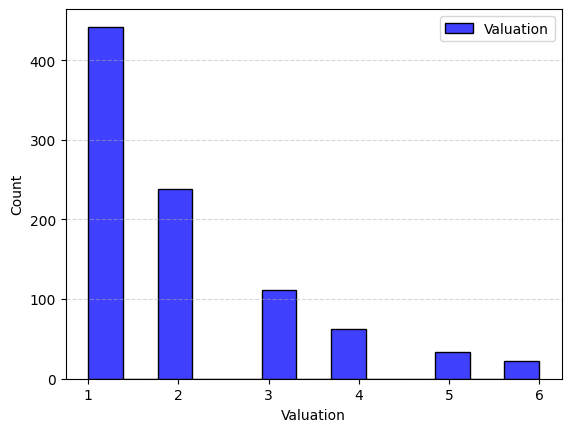

In [103]:
sns.histplot(companies['Valuation'], color='blue', label='Valuation')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)


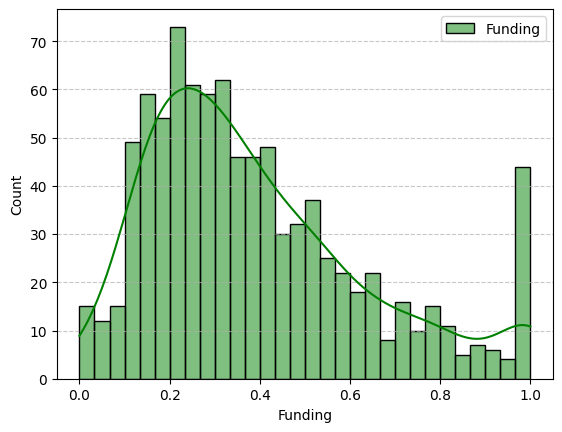

In [101]:
sns.histplot(companies['Funding'], kde= True, color= 'Green', label= 'Funding', bins = 30)
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha= 0.7)

**`Industry Analytics`**

<ipython-input-111-da5c2310c376>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')


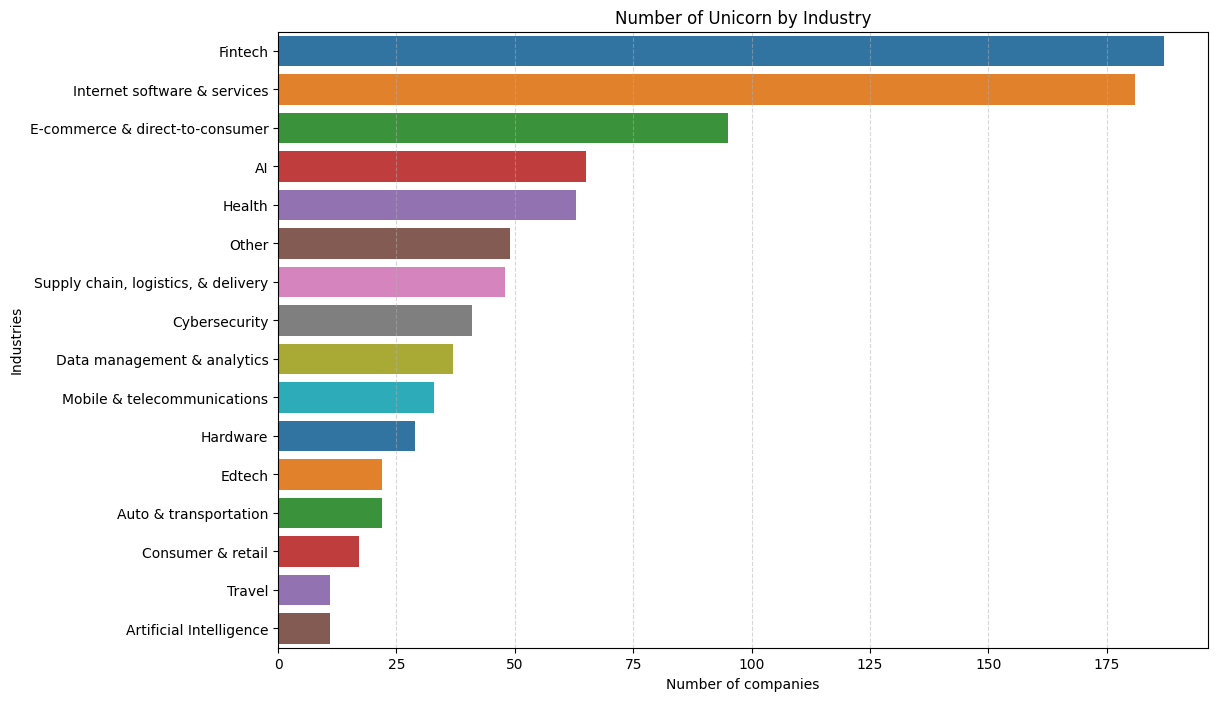

In [111]:
industry_counts = companies['Industry'].value_counts()
plt.figure(figsize=(12,8))
ax = sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')
ax.set_title('Number of Unicorn by Industry')
plt.xlabel('Number of companies')
plt.ylabel('Industries')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.show()

<ipython-input-112-dfa5b1f4a878>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  br = sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')


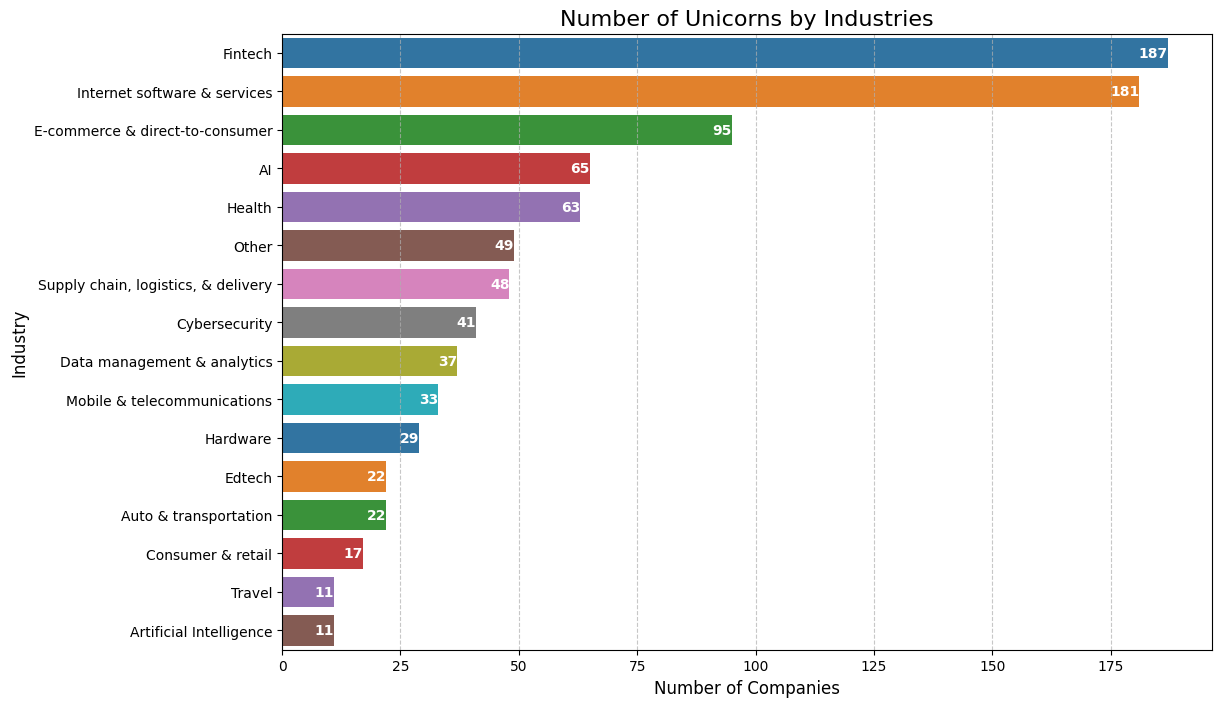

In [112]:
industry_counts = companies['Industry'].value_counts()

plt.figure(figsize=(12, 8))
br = sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')

for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), va='center', ha = 'right', color = 'white', fontweight='bold')

br.set_title('Number of Unicorns by Industries', fontsize=16)
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Geographics Analysis**

<ipython-input-113-0ed530de11b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  az = sns.barplot(y=continent_count.index, x=continent_count.values, palette='tab10')


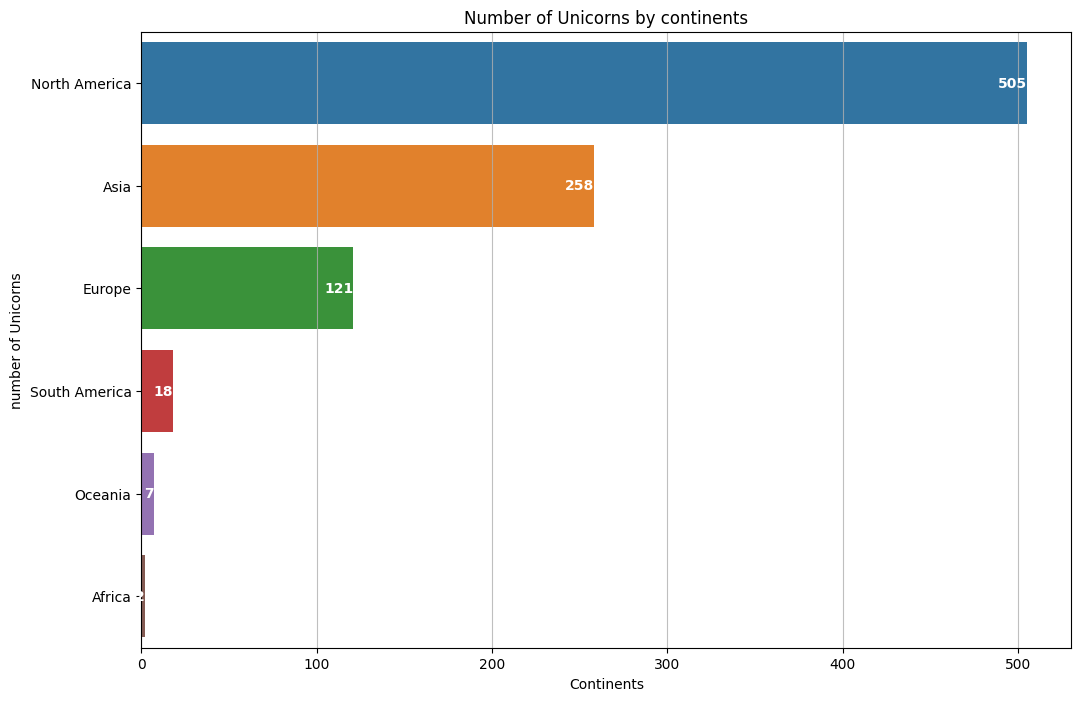

In [113]:
continent_count = companies['Continent'].value_counts()
plt.figure(figsize=(12, 8))
az = sns.barplot(y=continent_count.index, x=continent_count.values, palette='tab10')

# Annotating the bars
for index, value in enumerate(continent_count.values):
    plt.text(value, index, str(value),
             va='center',
             ha='right',
             color='white',
             fontweight='bold')

az.set_title('Number of Unicorns by continents')
plt.grid(axis='x', linestyle = '-', alpha = 0.8)
plt.xlabel('Continents')
plt.ylabel('number of Unicorns')
plt.show()

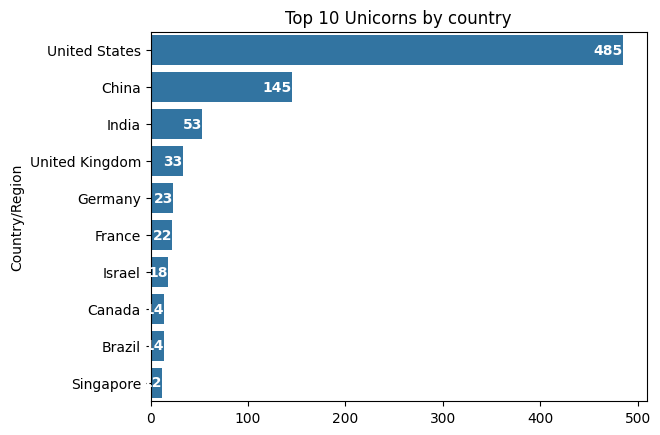

In [114]:
country_count = companies['Country/Region'].value_counts().head(10)
az = sns.barplot(y= country_count.index, x = country_count.values)
az.set_title('Top 10 Unicorns by country')
for index, value in enumerate(country_count.values):
  plt.text( value, index, str(value), va='center', ha='right', fontweight = 'bold' ,color = 'white')

<ipython-input-115-d0f96223df22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  br = sns.barplot(y= country_count.index, x = country_count.values, palette='tab10')


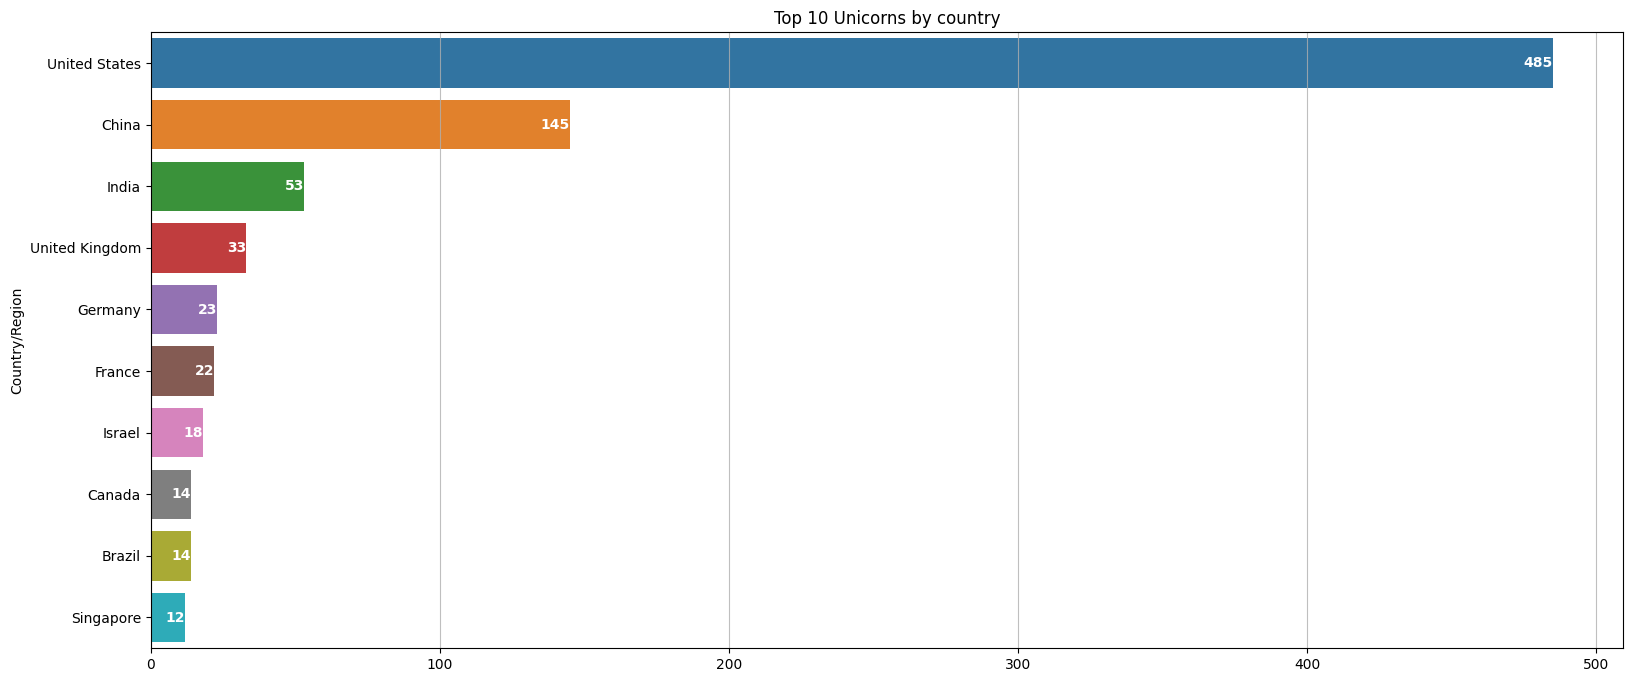

In [115]:
country_count = companies['Country/Region'].value_counts().head(10)
plt.figure(figsize = (19,8))
br = sns.barplot(y= country_count.index, x = country_count.values, palette='tab10')
br.set_title('Top 10 Unicorns by country')
for index, value in enumerate(country_count.values):
  plt.text( value, index, str(value), va='center', ha='right', fontweight = 'bold' ,color = 'white')
plt.grid(axis = 'x', linestyle = '-',alpha = 0.8)


# **Termporal Analysis**

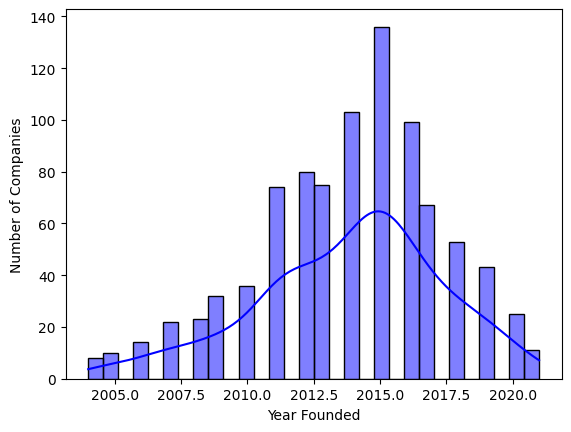

In [91]:
sns.histplot(companies['Year Founded'], bins = 30, kde = True, color = 'blue')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.show()

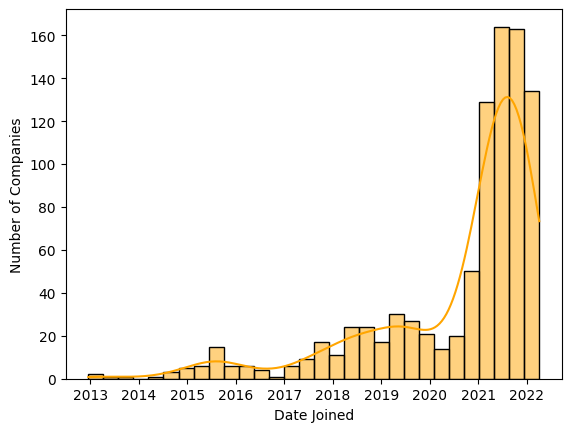

In [92]:
sns.histplot(companies['Date Joined'],bins = 30, kde = True, color = 'orange')
plt.xlabel('Date Joined')
plt.ylabel('Number of Companies')
plt.show()

# ***Investor Analysis***

In [93]:
investors = companies['Select Investors'].dropna().str.split(', ').sum()
investor_count = Counter(investors).most_common(10)
investor_count

[('Accel', 51),
 ('Andreessen Horowitz', 43),
 ('Insight Partners', 43),
 ('Tiger Global Management', 43),
 ('Sequoia Capital China', 36),
 ('Sequoia Capital', 35),
 ('Lightspeed Venture Partners', 30),
 ('General Catalyst', 29),
 ('Index Ventures', 27),
 ('SoftBank Group', 26)]

<ipython-input-116-548686a713d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ty = sns.barplot(y = list(investors_name), x = list(investors_frequeincies), palette='tab10')


Text(0, 0.5, 'Investors')

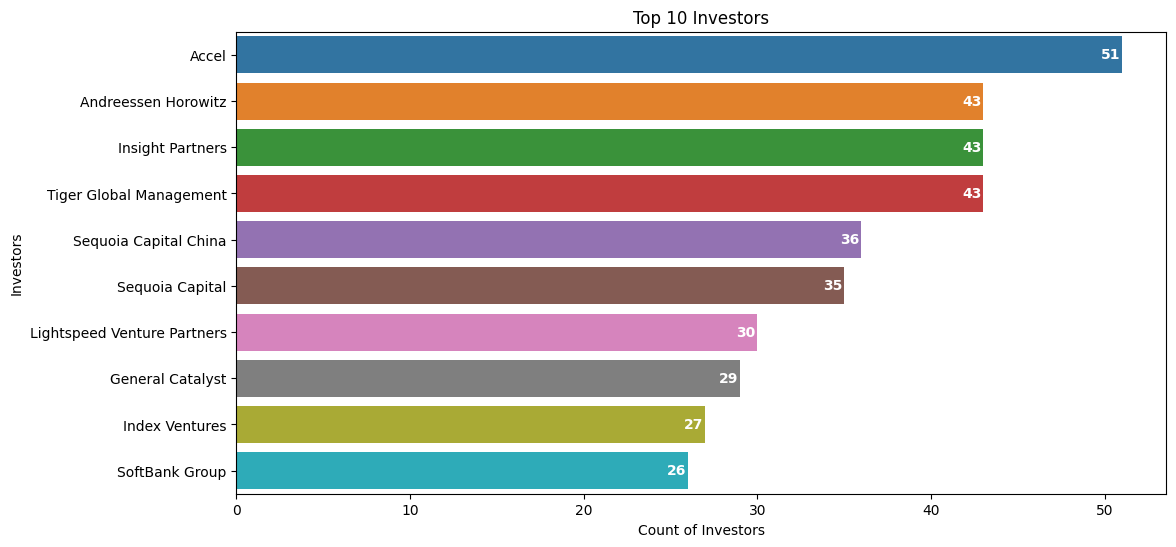

In [116]:
investors_name, investors_frequeincies = zip(*investor_count)

plt.figure(figsize = (12,6))
ty = sns.barplot(y = list(investors_name), x = list(investors_frequeincies), palette='tab10')

for index, value in enumerate(investors_frequeincies):
  plt.text(value - 0.1, index, str(value), va='center', fontweight='bold', fontsize=10, color='white', ha = 'right')

ty.set_title('Top 10 Investors')
plt.xlabel('Count of Investors')
plt.ylabel('Investors')


<ipython-input-117-199205909820>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx=sns.boxplot(data = companies, x = 'Funding', y = 'Industry', palette = 'Set3')


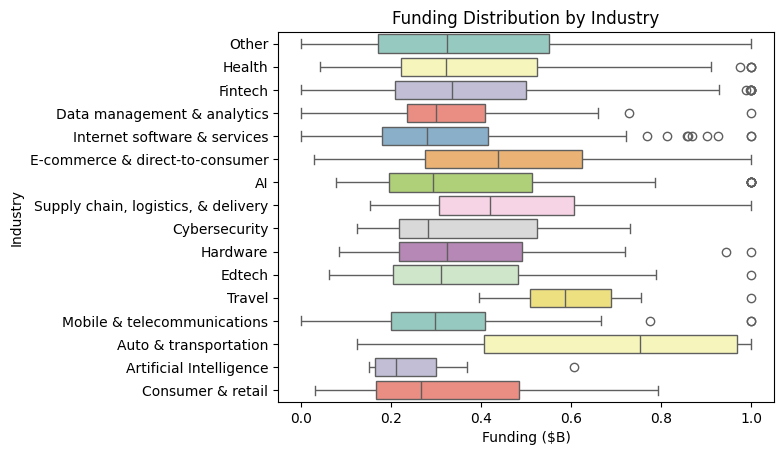

In [117]:
bx=sns.boxplot(data = companies, x = 'Funding', y = 'Industry', palette = 'Set3')
bx.set_title('Funding Distribution by Industry')
plt.xlabel('Funding ($B)')
plt.ylabel('Industry')
plt.show()

<ipython-input-119-e4f603eab300>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  az = sns.boxplot(data=companies, x='Funding', y='Industry', palette='Set3')


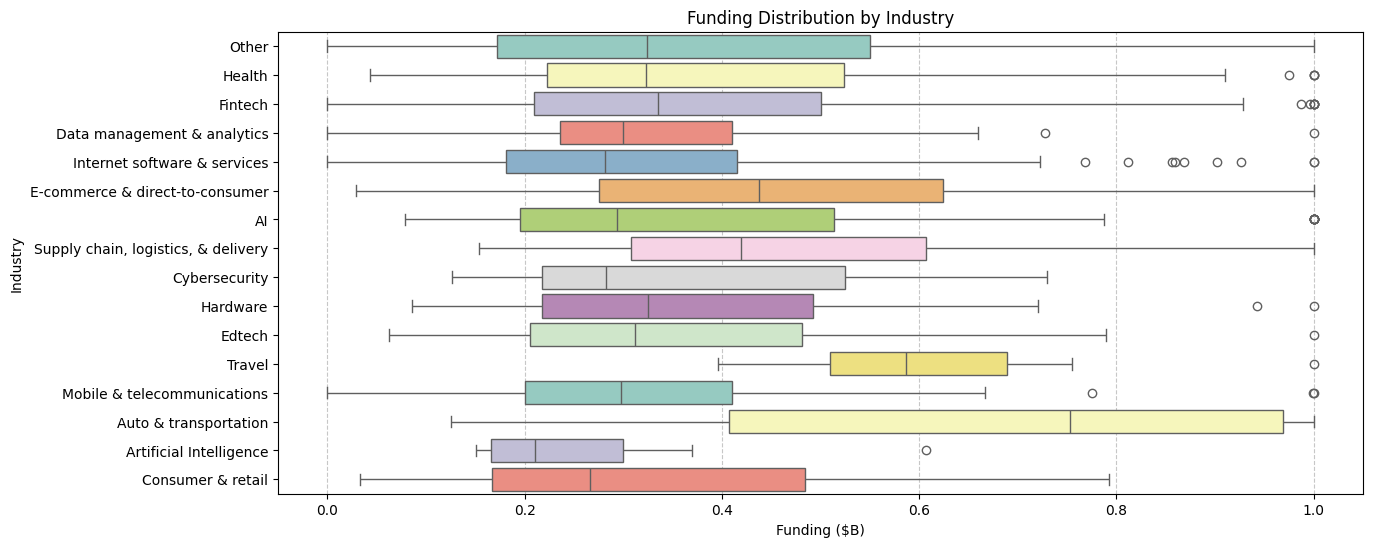

In [119]:
plt.figure(figsize=(14, 6))
az = sns.boxplot(data=companies, x='Funding', y='Industry', palette='Set3')
az.set_title('Funding Distribution by Industry')
plt.xlabel('Funding ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

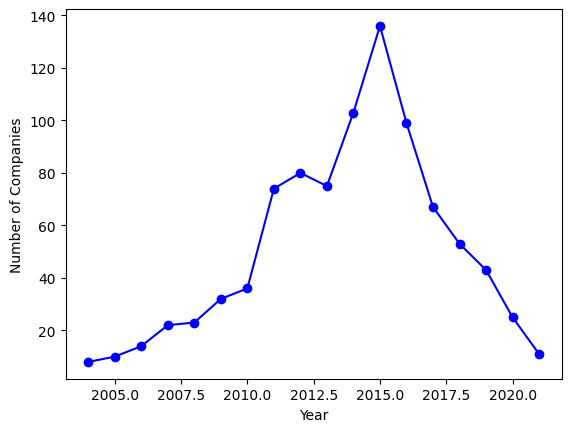

In [124]:
year_founded_count = companies['Year Founded'].value_counts().sort_index()
plt.plot(year_founded_count.index, year_founded_count.values, marker = 'o', color = 'blue')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()

In [126]:
companies['Year Joined'] = companies['Date Joined'].dt.year

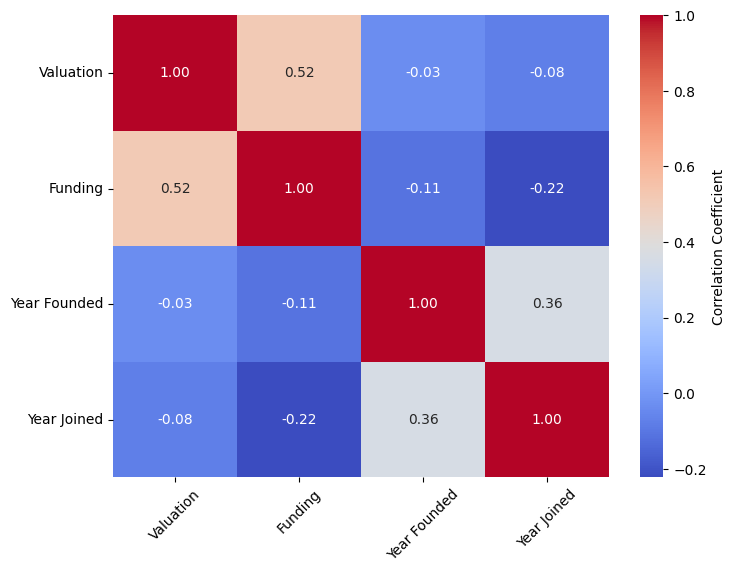

In [130]:
numerical_data = companies[['Valuation', 'Funding', 'Year Founded', 'Year Joined']].dropna()
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

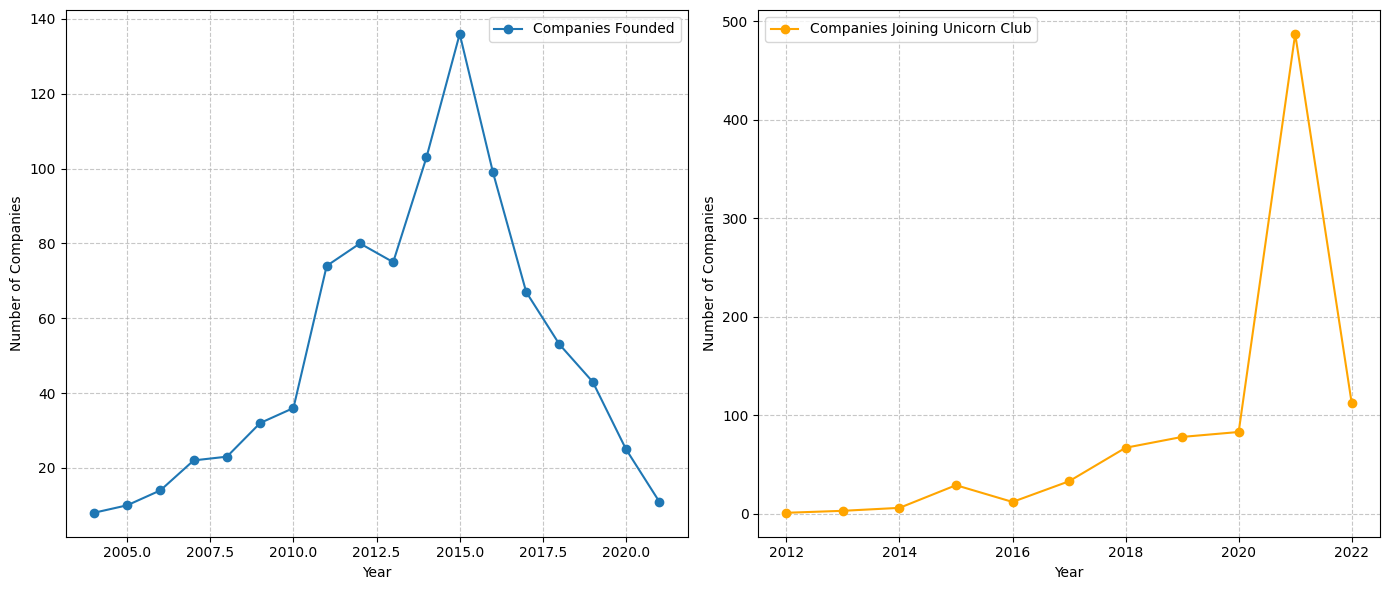

In [133]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
year_founded_count = companies['Year Founded'].value_counts().sort_index()
plt.plot(year_founded_count.index, year_founded_count.values, marker='o', label='Companies Founded')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


plt.subplot(1, 2, 2)
year_joined_count = companies['Date Joined'].dt.year.value_counts().sort_index()
plt.plot(year_joined_count.index, year_joined_count.values, marker='o', color='orange', label='Companies Joining Unicorn Club')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-135-9871668436de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  zt= sns.barplot(data = top_10_valuation, x = 'Valuation', y = 'Company', palette = 'Spectral')


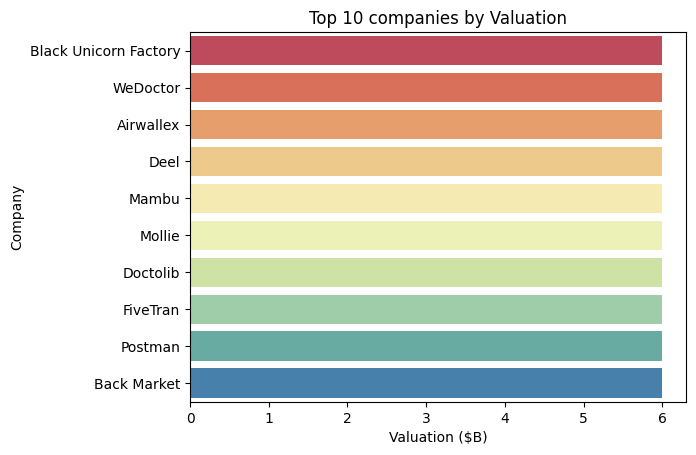

In [135]:
top_10_valuation = companies.nlargest(10, 'Valuation')[['Company', 'Valuation']]
zt= sns.barplot(data = top_10_valuation, x = 'Valuation', y = 'Company', palette = 'Spectral')
zt.set_title('Top 10 companies by Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Company')
plt.show()

<ipython-input-136-bc64c3370df1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  tt=sns.barplot(data=top_10_valuation, x='Valuation', y='Company', palette='Spectral')


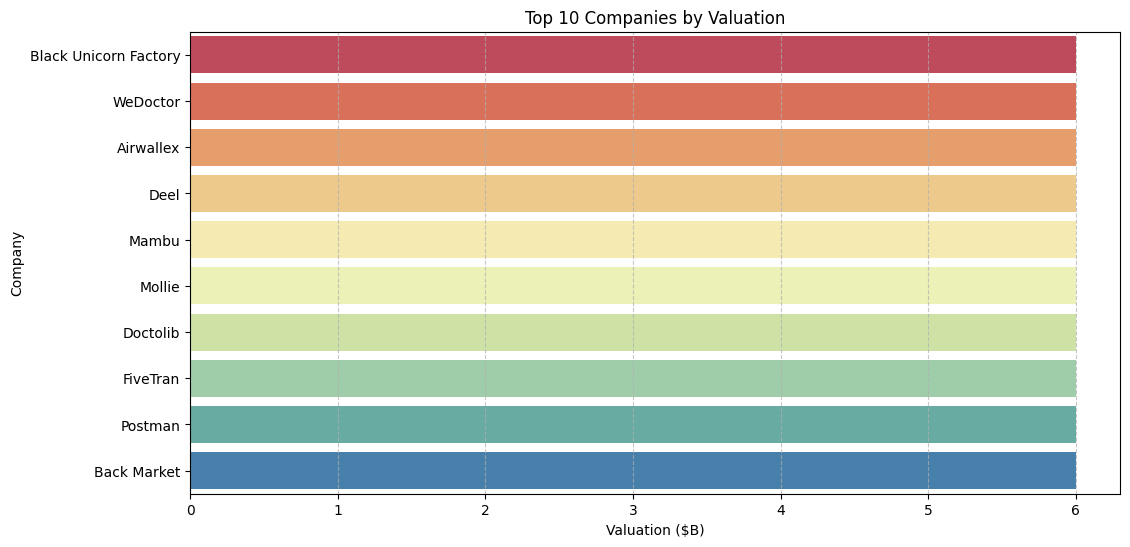

In [136]:
top_10_valuation = companies.nlargest(10, 'Valuation')[['Company', 'Valuation']]

plt.figure(figsize=(12, 6))
tt=sns.barplot(data=top_10_valuation, x='Valuation', y='Company', palette='Spectral')
tt.set_title('Top 10 Companies by Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

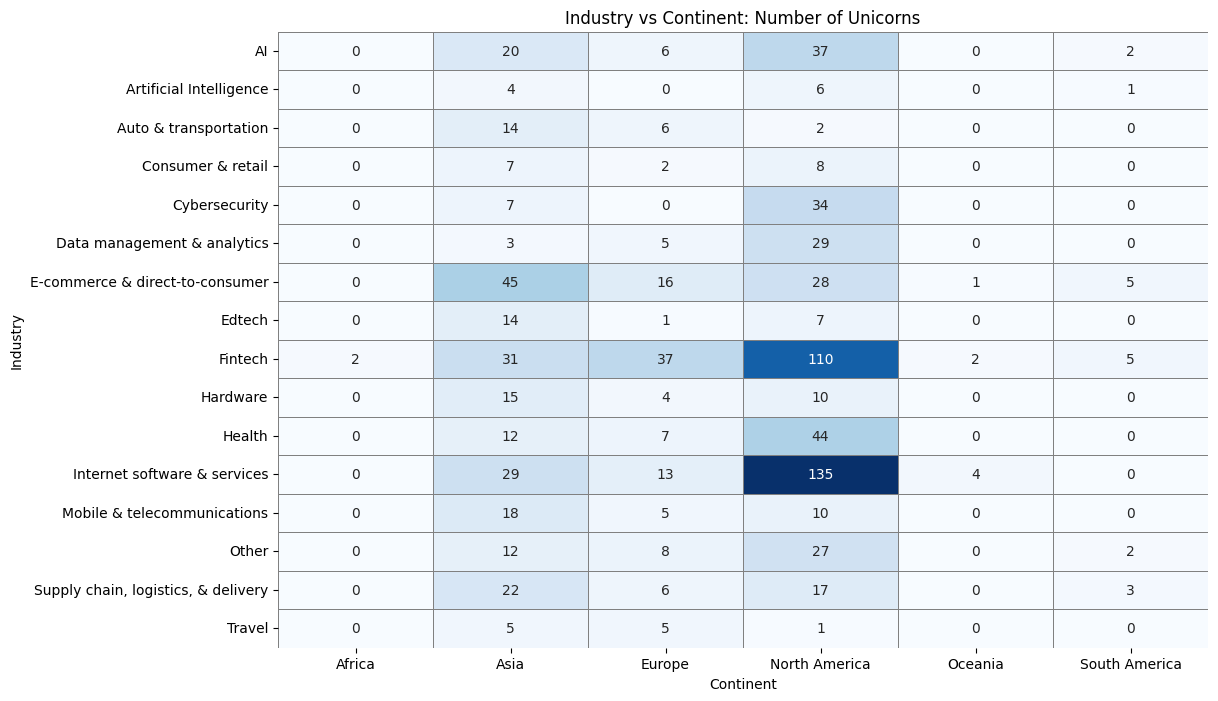

In [138]:
industry_continent_matrix = companies.groupby(['Industry', 'Continent']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
ae=sns.heatmap(industry_continent_matrix, cmap='Blues', annot=True, fmt="d", cbar=False, linewidths=0.5, linecolor='gray')
ae.set_title('Industry vs Continent: Number of Unicorns')
plt.xlabel('Continent')
plt.ylabel('Industry')
plt.show()

In [139]:
companies['Years to Join'] = companies['Date Joined'].dt.year - companies['Year Founded']

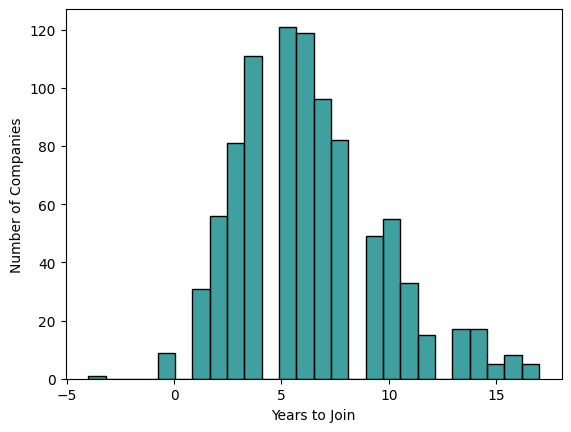

In [141]:
sns.histplot(companies['Years to Join'], color = 'teal')

plt.xlabel('Years to Join')
plt.ylabel('Number of Companies')
plt.show()

# **Bivariate Analysis**

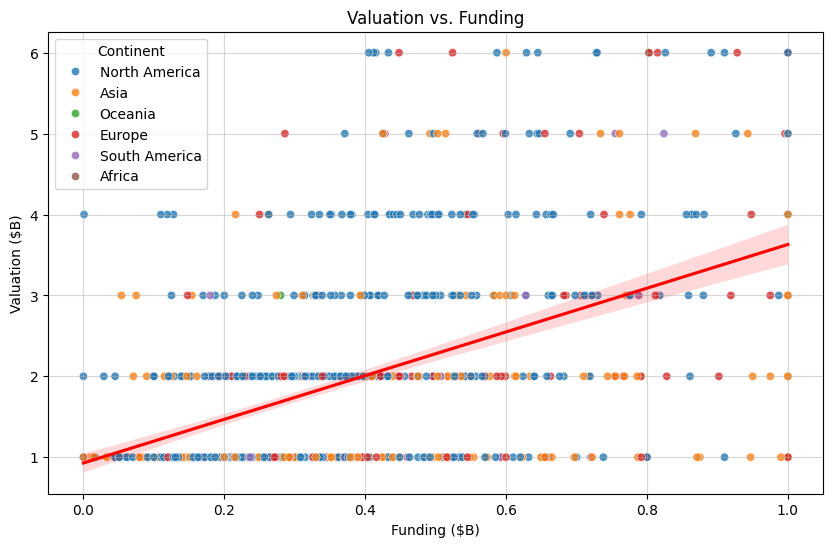

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=companies, x='Funding', y='Valuation', hue = 'Continent',  palette='tab10', alpha=0.8)
ab=sns.regplot(data=companies, x='Funding', y='Valuation', scatter=False, color='red', line_kws={"label": "Trendline"})
ab.set_title('Valuation vs. Funding')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.legend(title='Continent')
plt.grid(alpha=0.5)
plt.show()

#hue='Continent',

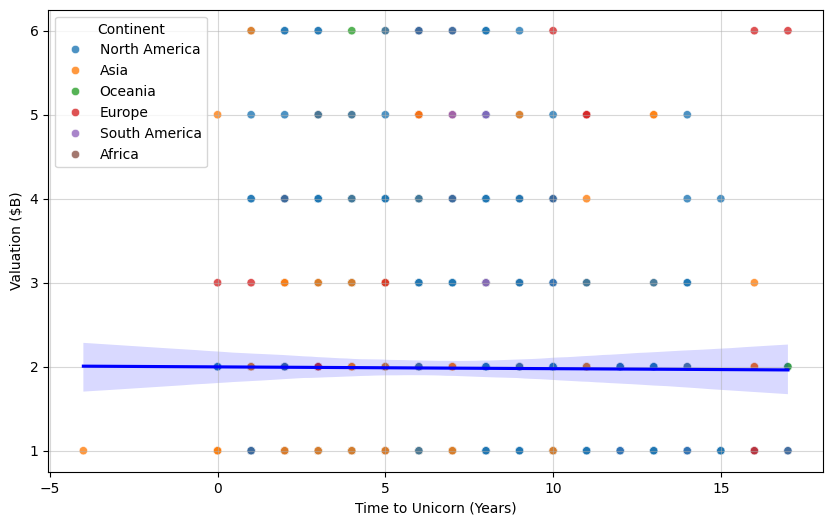

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=companies, x='Years to Join', y='Valuation', hue='Continent', palette='tab10', alpha=0.8)
sns.regplot(data=companies, x='Years to Join', y='Valuation', scatter=False, color='blue', line_kws={"label": "Trendline"})
plt.xlabel('Time to Unicorn (Years)')
plt.ylabel('Valuation ($B)')
plt.legend(title='Continent')
plt.grid(alpha=0.5)
plt.show()

Valuation by Continent

<ipython-input-146-23a15f9a77bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=companies, x='Continent', y='Valuation', palette='Set2')


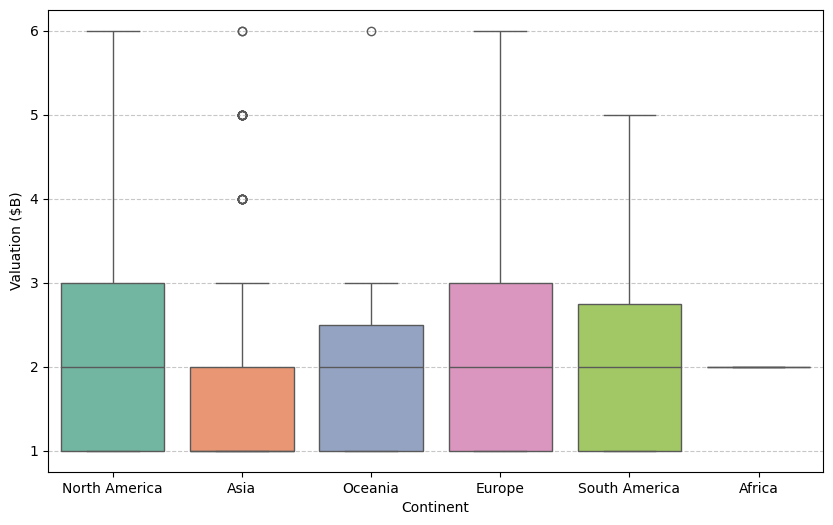

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=companies, x='Continent', y='Valuation', palette='Set2')
plt.xlabel('Continent')
plt.ylabel('Valuation ($B)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Multivariate Analysis**

TypeError: 'str' object is not callable

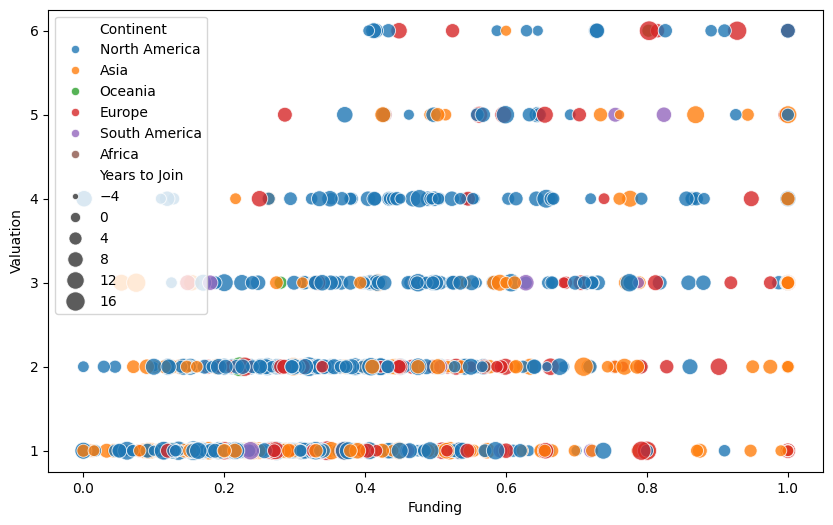

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=companies,
    x='Funding',
    y='Valuation',
    hue='Continent',
    size='Years to Join',
    palette='tab10',
    alpha=0.8,
    sizes=(20, 200)
)
plt.title('Valuation vs. Funding by Continent (Bubble Size: Time to Unicorn)')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# **FacetGrid: Valuation and Funding across Continents and Industries**

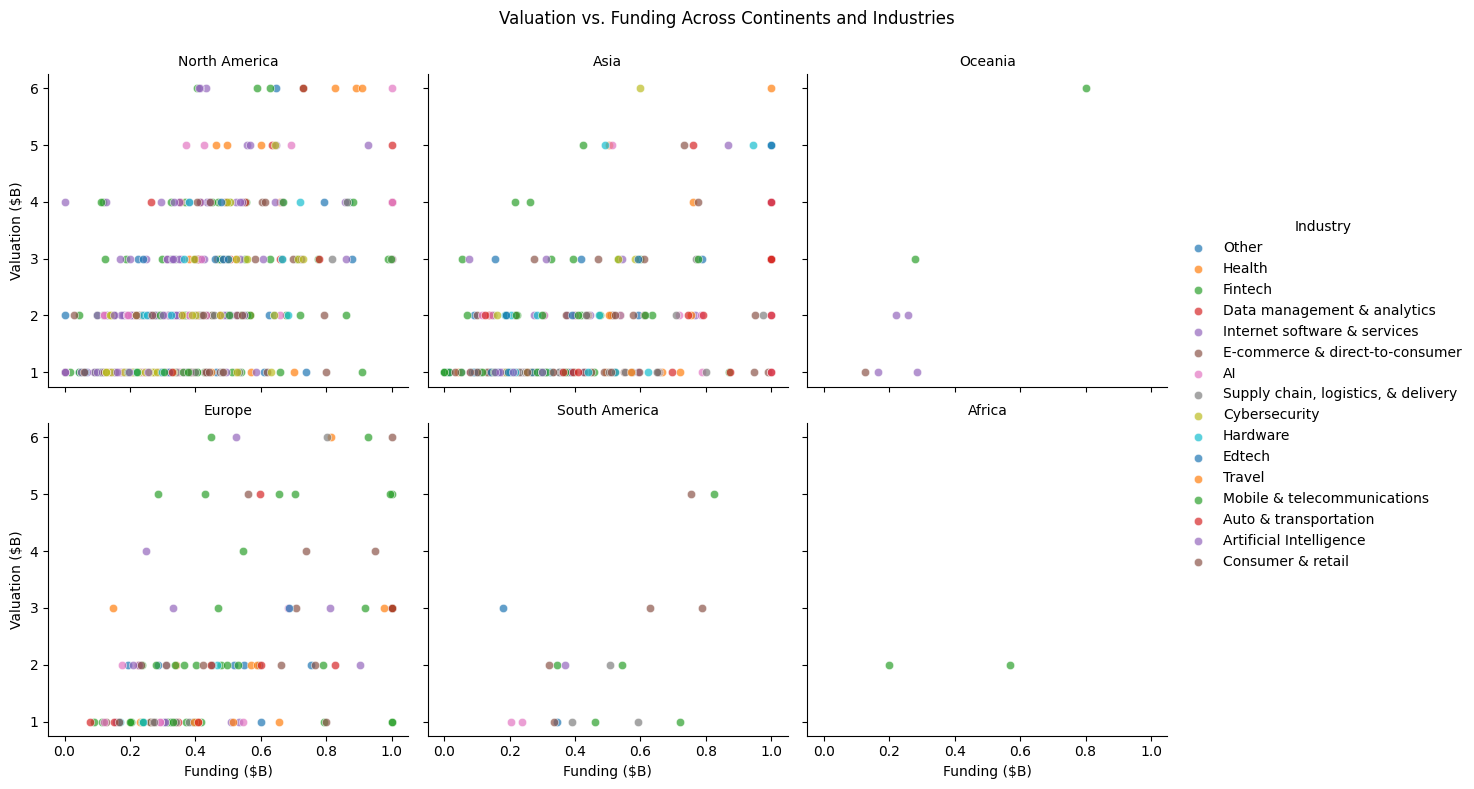

In [148]:
g = sns.FacetGrid(companies, col='Continent', hue='Industry', col_wrap=3, height=4, palette='tab10')
g.map(sns.scatterplot, 'Funding', 'Valuation', alpha=0.7)
g.add_legend()
g.set_titles('{col_name}')
g.set_axis_labels('Funding ($B)', 'Valuation ($B)')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Valuation vs. Funding Across Continents and Industries')
plt.show()

# *Expanded Correlation Matrix*

TypeError: 'str' object is not callable

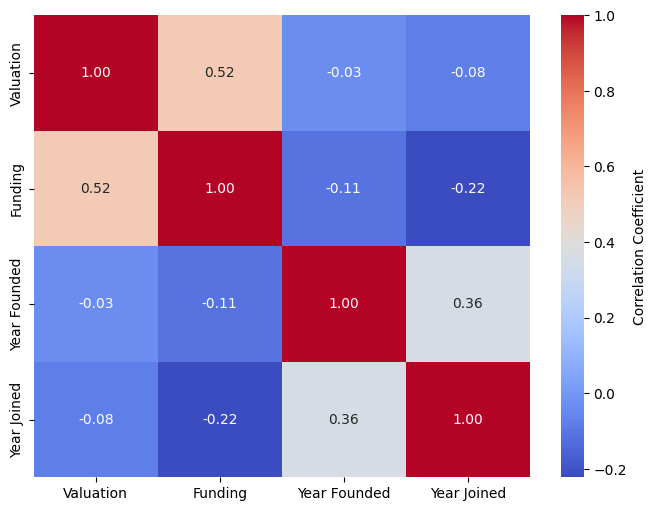

In [150]:
expanded_corr = companies[['Valuation', 'Funding', 'Year Founded', 'Year Joined']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(expanded_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Expanded Correlation Matrix')
plt.show()